##프로젝트 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_diabetes
X, y=load_diabetes(return_X_y=True)

In [8]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [11]:
W=np.random.rand(X_train.shape[1])
b=np.random.rand()

In [13]:
len(W)

10

In [14]:
def model(X,W,b):
  predictions=0
  for i in range(len(W)):
    predictions+=W[i]*X[:,i]
  predictions+=b
  return predictions

In [15]:
def MSE(a,b):
  return ((a-b)**2).mean()

In [16]:
def loss(X,W,b,y):
  predictions=model(X,W,b)
  L=MSE(y,predictions)
  return L

In [17]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [26]:
lr=0.1

In [29]:
max_iter = 1000
tolerance = 1e-4

losses = []
prev_loss = float('inf')

for i in range(1, max_iter + 1):
    dW, db = gradient(X_train, W, b, y_train)

    W -= lr * dW
    b -= lr * db

    current_loss = loss(X_train, W, b, y_train)
    losses.append(current_loss)

    if i % 100 == 0:
        print(f"Iteration {i} : Loss {current_loss:.4f}")

    if abs(prev_loss - current_loss) < tolerance:
        print(f"Stopped early at iteration {i}.")
        break

    prev_loss = current_loss


Iteration 100 : Loss 3045.6981
Iteration 200 : Loss 3033.0805
Iteration 300 : Loss 3021.6337
Iteration 400 : Loss 3011.2378
Iteration 500 : Loss 3001.7873
Iteration 600 : Loss 2993.1890
Iteration 700 : Loss 2985.3598
Iteration 800 : Loss 2978.2257
Iteration 900 : Loss 2971.7207
Iteration 1000 : Loss 2965.7853


In [30]:
prediction=model(X_test,W,b)
lss=loss(X_test, W, b, y_test)
lss

np.float64(2867.5382696862107)

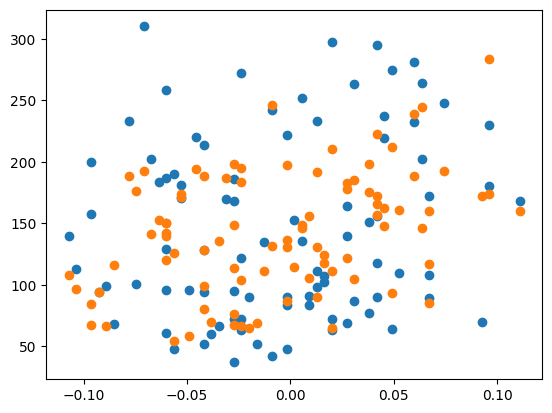

In [31]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

##프로젝트 2

In [32]:
!unzip /content/bike-sharing-demand.zip

Archive:  /content/bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [33]:
train=pd.read_csv('/content/train.csv')

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [35]:
train['datetime']=pd.to_datetime(train['datetime'])
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

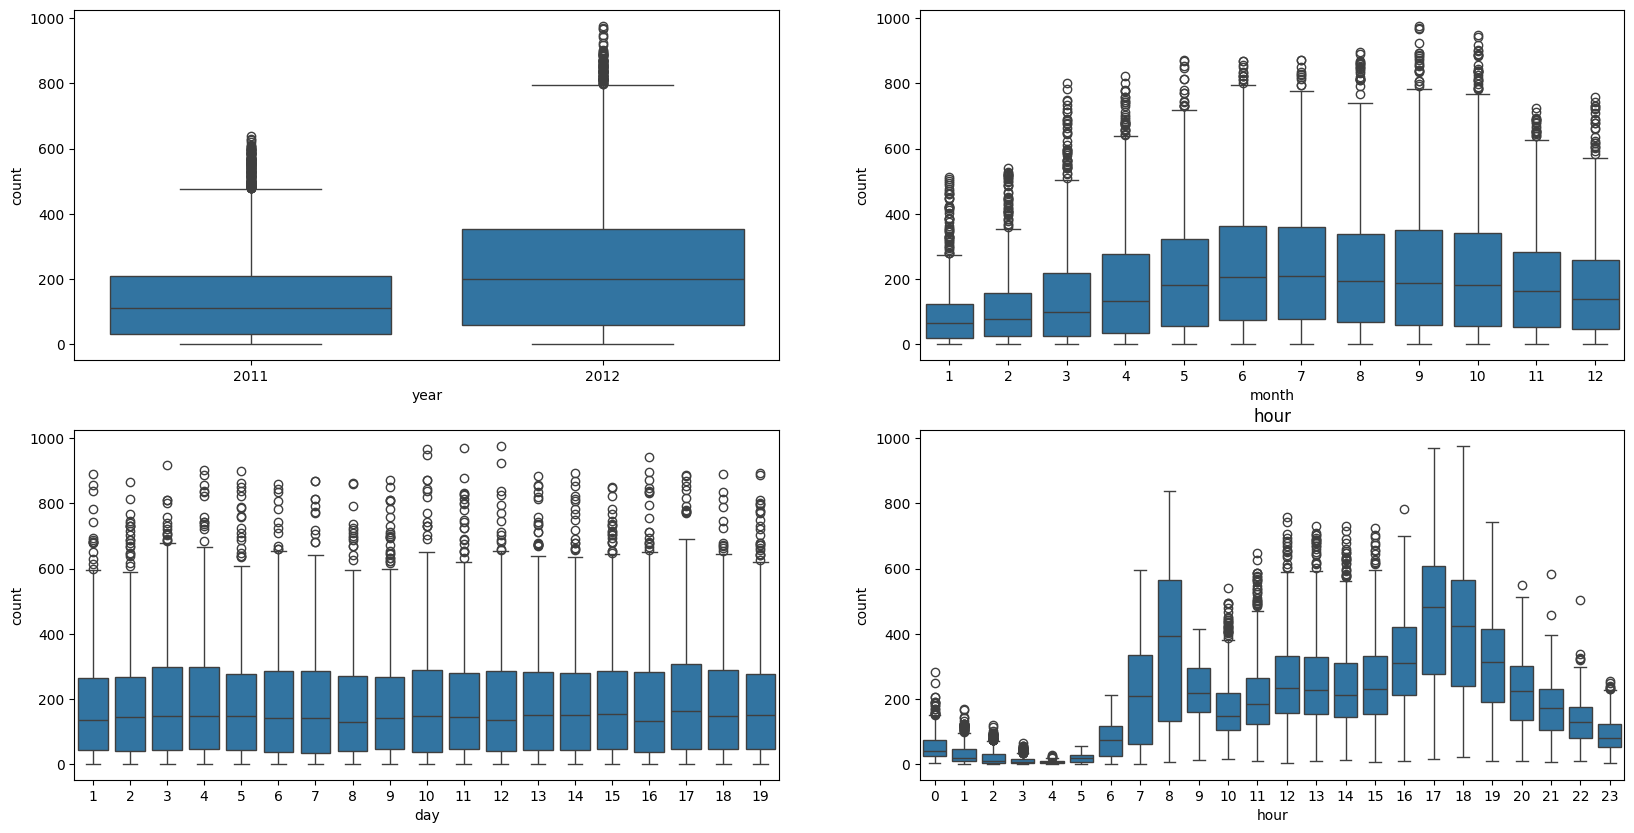

In [42]:
import seaborn as sns
fig,ax=plt.subplots(2,2,figsize=(20,10))
cols=['year','month','day','hour']
for ax,col in zip(ax.flatten(), cols):
  sns.boxplot(data=train, x=col, y='count', ax=ax)
  plt.title(col)

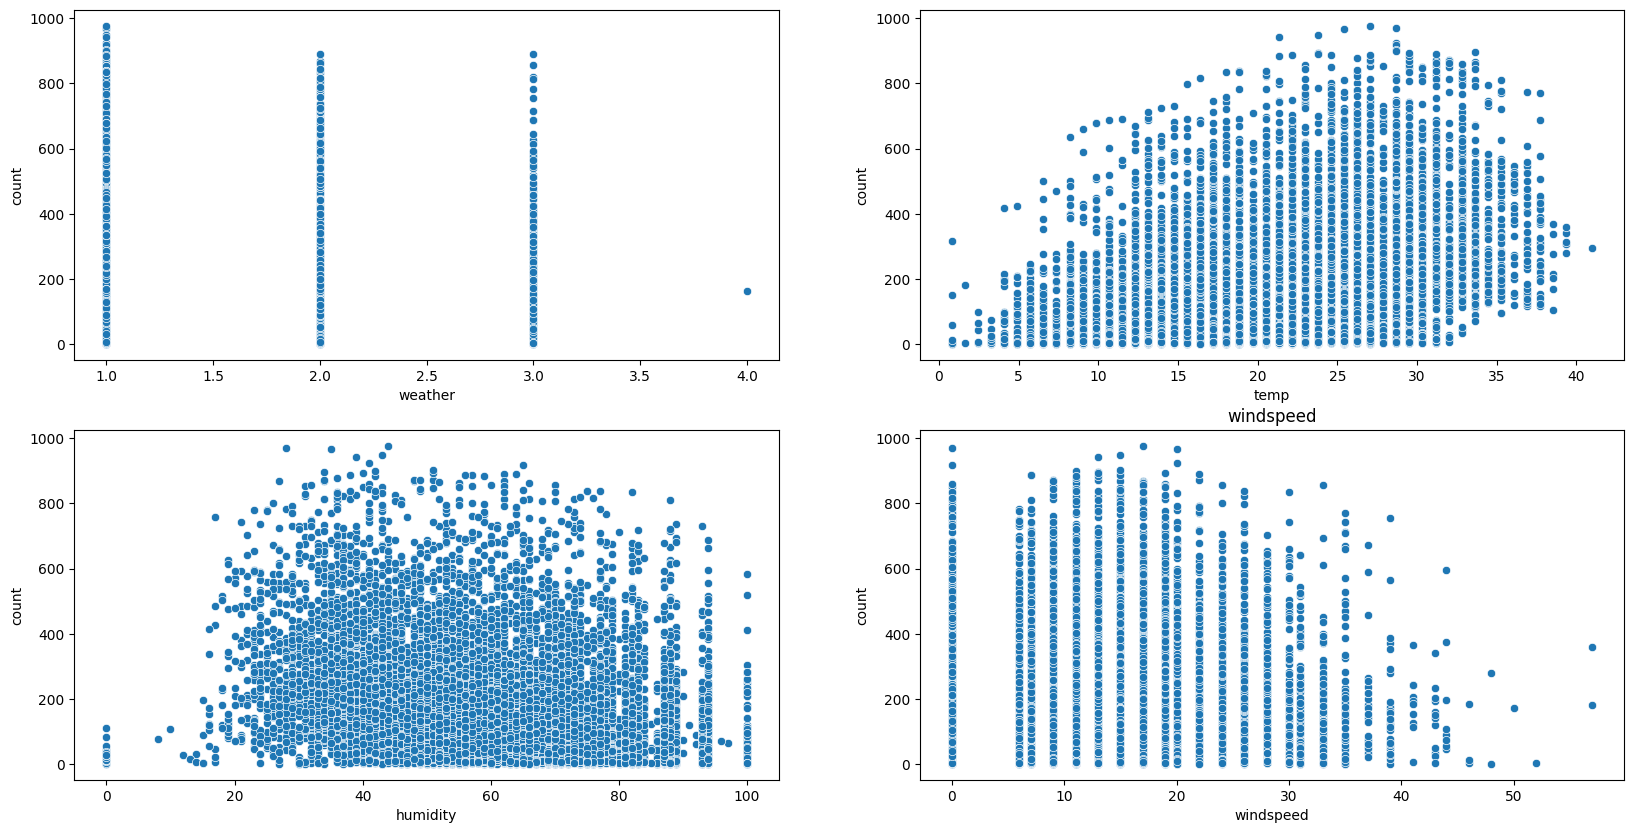

In [44]:
cols=['weather', 'temp', 'humidity', 'windspeed']
fig, ax=plt.subplots(2,2, figsize=(20,10))
for ax, col in zip(ax.flatten(),cols):
  sns.scatterplot(data=train, x=col, y='count', ax=ax)
  plt.title(col)

In [47]:
train.groupby('workingday')['count'].mean()

,count
workingday,
0,188.506621
1,193.011873


<Axes: xlabel='hour', ylabel='count'>

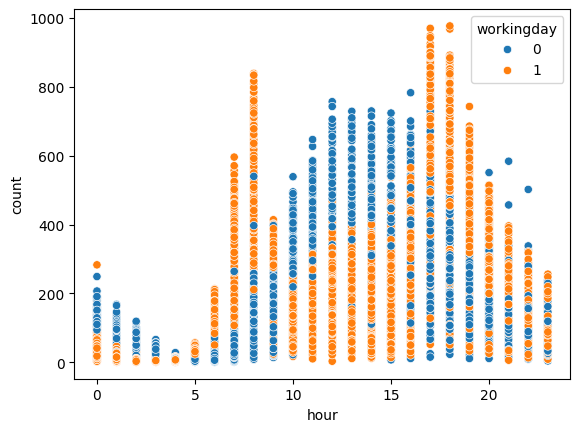

In [49]:
sns.scatterplot(data=train, hue='workingday', y='count', x='hour')

<Axes: >

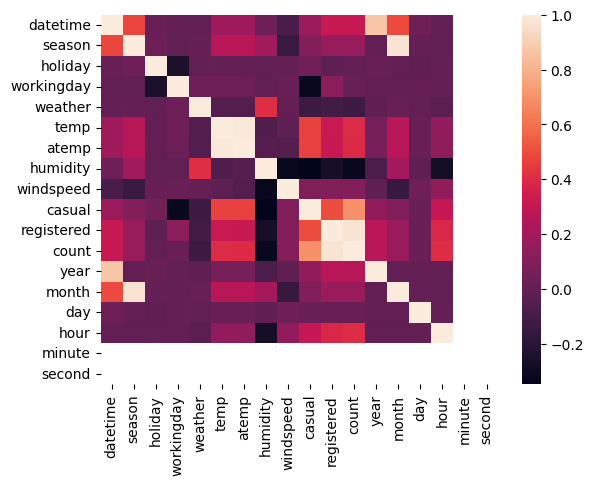

In [50]:
sns.heatmap(train.corr())

2012년에는 2011년에 비해 전반적으로 자전거 대여 수가 증가한 것으로 나타났습니다. 월별로는 6월부터 9월까지 여름철에 수요가 가장 많았고, 겨울철에는 감소하는 경향을 보였습니다. 시간대별로는 근무일일 경우 오전 8시와 오후 5-6시 사이, 출퇴근 시간에 대여가 급증하였으며, 휴일에는 오후 2-3시 사이에 대여 수가 많았습니다.

날씨가 나쁠수록 대여 수가 줄어들었으며, 특히 날씨 코드가 3 또는 4일 경우 대여 수가 매우 적었습니다. 온도는 대체로 상승할수록 대여량이 증가하였으며, 25도 정도까지는 양의 상관관계를 보였습니다. 반면 습도와 풍속은 높을수록 대여 수에 부정적인 영향을 주는 경향이 있었습니다.

상관관계 분석 결과, 등록 사용자 수가 전체 대여 수와 매우 높은 상관관계를 보였고, 실제 기온(temp)과 체감 온도(atemp)는 거의 동일한 값을 가지므로 모델링 시 하나를 제외하는 것이 바람직할 수 있습니다. 또한 workingday(근무일) 여부에 따라 시간대별 대여 패턴이 뚜렷하게 구분되는 점도 확인되었습니다.

이러한 분석을 통해 자전거 대여량에 영향을 주는 주요 변수는 시간대, 온도, 날씨, 근무일 여부, 연도 등임을 알 수 있습니다.

In [51]:
train['peak_hour']=train['hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)
train.groupby('peak_hour')['count'].mean()

,count
peak_hour,
0,143.326628
1,335.504574


<Axes: xlabel='peak_hour', ylabel='count'>

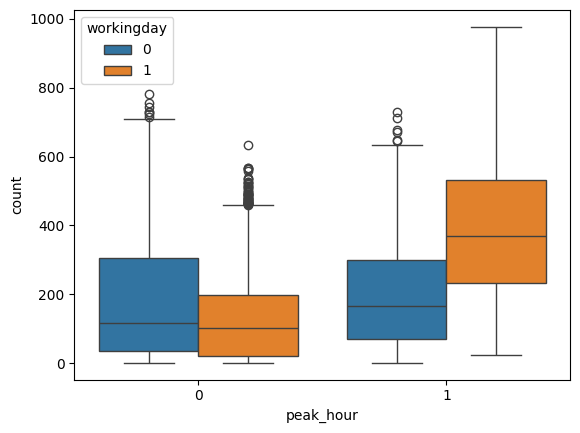

In [52]:
sns.boxplot(data=train, x='peak_hour', y='count', hue='workingday')

In [53]:
print(train['count'].corr(train['peak_hour']))

0.4600538398481928


In [62]:
train['temp_int']=pd.cut(train['temp'], bins=[train['temp'].min(), train['temp'].median(), train['temp'].max()], labels=[0,1], include_lowest=True)

In [63]:
train['temp_int'].value_counts()

,count
temp_int,
0,5635
1,5251


In [64]:
train['temp_int'].corr(train['count'])

np.float64(0.3158580649454447)

In [65]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'peak_hour',
       'temp_int'],
      dtype='object')

In [66]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed','holiday', 'workingday','peak_hour','temp_int']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

14645.22463988905
121.01745593049397


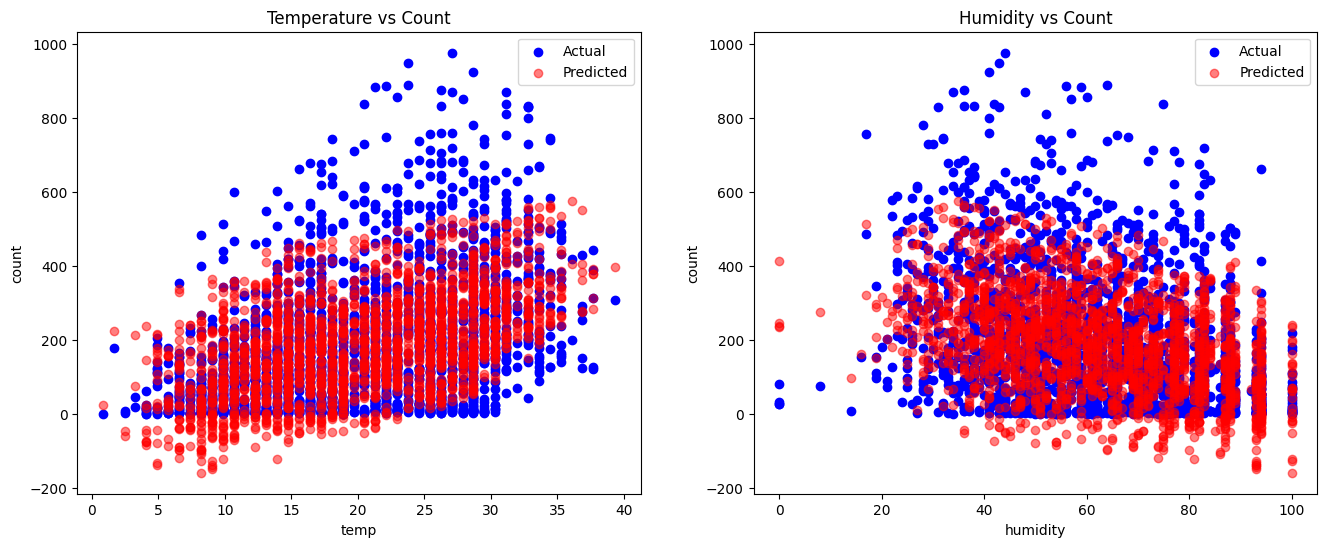

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [73]:
from lightgbm import LGBMRegressor
model_1=LGBMRegressor()
model_1.fit(X_train, y_train)
pred_1=model_1.predict(X_test)

mse_1=mean_squared_error(y_test, pred_1)
rmse_1=np.sqrt(mse_1)
print(mse_1)
print(rmse_1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 11
[LightGBM] [Info] Start training from score 191.584750
1822.6297180775844
42.69226766145814


# MSE=1822.6297180775844
# RMSE=42.69226766145814